In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filtaer-data/Final Data/Lable/6.nii
/kaggle/input/filtaer-data/Final Data/Lable/8.nii
/kaggle/input/filtaer-data/Final Data/Lable/7.nii
/kaggle/input/filtaer-data/Final Data/Lable/4.nii
/kaggle/input/filtaer-data/Final Data/Lable/5.nii
/kaggle/input/filtaer-data/Final Data/Lable/3.nii
/kaggle/input/filtaer-data/Final Data/Lable/2.nii
/kaggle/input/filtaer-data/Final Data/Lable/1.nii
/kaggle/input/filtaer-data/Final Data/Image/6.nii
/kaggle/input/filtaer-data/Final Data/Image/8.nii
/kaggle/input/filtaer-data/Final Data/Image/7.nii
/kaggle/input/filtaer-data/Final Data/Image/4.nii
/kaggle/input/filtaer-data/Final Data/Image/5.nii
/kaggle/input/filtaer-data/Final Data/Image/3.nii
/kaggle/input/filtaer-data/Final Data/Image/2.nii
/kaggle/input/filtaer-data/Final Data/Image/1.nii


In [13]:
# Final Data
# │
# ├── Image
# │   ├── 1.nii
# │   ├── 2.nii
# │   ├── 3.nii
# │   ├── 4.nii
# │   ├── 5.nii
# │   ├── 6.nii
# │   ├── 7.nii
# │   └── 8.nii
# │
# └── Label
#     ├── 1.nii
#     ├── 2.nii
#     ├── 3.nii
#     ├── 4.nii
#     ├── 5.nii
#     ├── 6.nii
#     ├── 7.nii
#     └── 8.nii

In [14]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os

# Load NIfTI image
def visualize(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()

    # Plot slices in 2D from different angles
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # XY plane
    axes[0].imshow(data.sum(axis=2), cmap='gray')
    axes[0].set_title('XY plane')

    # XZ plane
    axes[1].imshow(data.transpose(1, 0, 2).sum(axis=2), cmap='gray', origin='lower')
    axes[1].set_title('XZ plane')

   #  YZ plane
    axes[2].imshow(data.transpose(2, 0, 1).sum(axis=2), cmap='gray', origin='lower')
    axes[2].set_title('YZ plane')

    plt.show()

# 2D Visualization

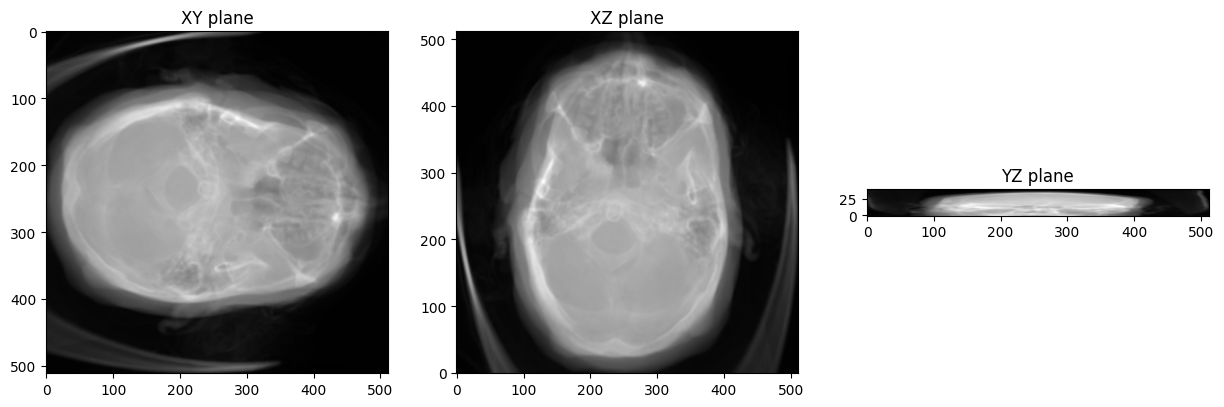

In [15]:
visualize("/kaggle/input/filtaer-data/Final Data/Image/3.nii")

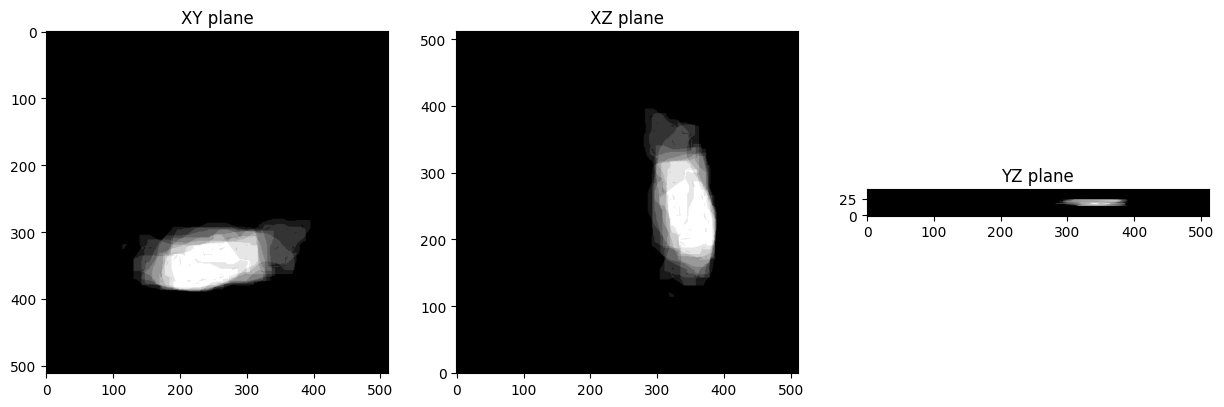

In [16]:
visualize("/kaggle/input/filtaer-data/Final Data/Lable/3.nii")

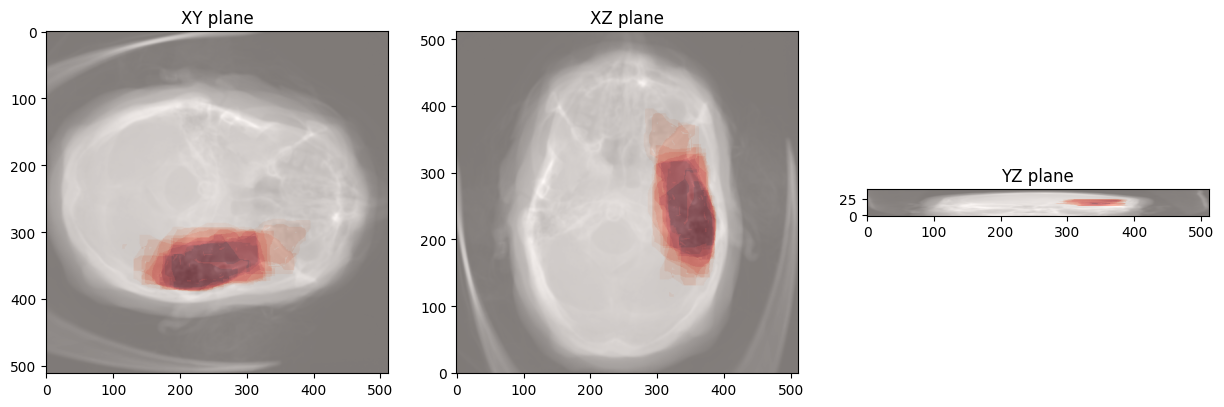

In [17]:
# Load brain image
brain_file_path = '/kaggle/input/filtaer-data/Final Data/Image/3.nii'
brain_img = nib.load(brain_file_path)
brain_data = brain_img.get_fdata()

# Load labeled areas
label_file_path = '/kaggle/input/filtaer-data/Final Data/Lable/3.nii'
label_img = nib.load(label_file_path)
label_data = label_img.get_fdata()

# Plot slices in 2D from different angles with color representing brain image and labeled areas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# XY plane
axes[0].imshow(brain_data.sum(axis=2), cmap='gray')
axes[0].imshow(label_data.sum(axis=2), cmap='Reds', alpha=0.5)
axes[0].set_title('XY plane')

# XZ plane
axes[1].imshow(brain_data.transpose(1, 0, 2).sum(axis=2), cmap='gray', origin='lower')
axes[1].imshow(label_data.transpose(1, 0, 2).sum(axis=2), cmap='Reds', alpha=0.5, origin='lower')
axes[1].set_title('XZ plane')

# YZ plane
axes[2].imshow(brain_data.transpose(2, 0, 1).sum(axis=2), cmap='gray', origin='lower')
axes[2].imshow(label_data.transpose(2, 0, 1).sum(axis=2), cmap='Reds', alpha=0.5, origin='lower')
axes[2].set_title('YZ plane')

plt.show()

# 3D Visualization

In [18]:
def load_data(image_path, label_path):
    # Load the NIfTI images and labels
    image_nifti = nib.load(image_path)
    label_nifti = nib.load(label_path)

    # Extract the image and label arrays
    image_data = image_nifti.get_fdata()
    label_data = label_nifti.get_fdata()

    return image_data, label_data

def plot_slices(image_data, label_data):
    # Plot slices of the image and corresponding label
    num_slices = image_data.shape[-1]

    for i in range(num_slices):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(image_data[:, :, i], cmap='gray')
        plt.title(f'Image - Slice {i + 1}')

        plt.subplot(1, 2, 2)
        plt.imshow(label_data[:, :, i], cmap='gray')
        plt.title(f'Label - Slice {i + 1}')

        plt.show()

if __name__ == "__main__":
    data_dir = "/kaggle/input/filtaer-data/Final Data"

    for i in range(1, 9):  # Assuming you have eight pairs of images and labels
        image_path = os.path.join(data_dir, "Image", f"{i}.nii")
        label_path = os.path.join(data_dir, "Lable", f"{i}.nii")

        image_data, label_data = load_data(image_path, label_path)


In [19]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

def plot_slices(image_data, label_data):
    # Create a figure for the plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Define the function for updating the plot
    def update(i):
        # Clear the current plot
        ax.cla()

        # Plot the image for the current slice
        ax.imshow(image_data[:, :, i], cmap='gray')
        ax.set_title(f'Slice {i + 1}')

        # Overlay the label data in red
        mask = np.ma.masked_where(label_data[:, :, i] == 0, label_data[:, :, i])
        ax.imshow(mask, alpha=0.5, cmap='Reds')

    # Create the animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, image_data.shape[-1]), interval=200)

    # Convert the animation to HTML5 video
    html5_video = HTML(anim.to_html5_video())

    # Close the figure to prevent it from displaying a static image
    plt.close(fig)

    return html5_video

# Use the function
html5_video = plot_slices(image_data, label_data)
html5_video

**Lets add color to hypodense region of Brain**

In [20]:
import seaborn as sns  
def plot_slices(image_data, label_data):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Define the function for updating the plot
    def update(i):
        # Clear the current plot
        ax.cla()

        # Plot the image for the current slice
        ax.imshow(image_data[:, :, i], cmap='gray')
        ax.set_title(f'Slice {i + 1}')

        # Create a heatmap color mapping for the label data
        sns.heatmap(label_data[:, :, i], ax=ax, alpha=0.5, cmap='coolwarm', cbar=False, annot=False)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, image_data.shape[-1]), interval=200)

    # Convert the animation to HTML5 video
    html5_video = HTML(anim.to_html5_video())
    plt.close(fig)

    return html5_video

# Use the function
html5_video = plot_slices(image_data, label_data)
html5_video

**Lets add its slice number to hypodense region of Brain**

In [21]:
def plot_slices(image_data, label_data):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Get the indices of slices where label data is visible
    visible_slices = [i for i in range(label_data.shape[-1]) if np.any(label_data[:, :, i])]

    # Define the function for updating the plot
    def update(i):
        # Clear the current plot
        ax.cla()

        # Plot the image for the current slice
        ax.imshow(image_data[:, :, visible_slices[i]], cmap='gray')
        ax.set_title(f'Slice {visible_slices[i] + 1}')

        # Create a heatmap color mapping for the label data
        sns.heatmap(label_data[:, :, visible_slices[i]], ax=ax, alpha=0.5, cmap='coolwarm', cbar=False, annot=False)

    # Create the animation
    anim = FuncAnimation(fig, update, frames=np.arange(0, len(visible_slices)), interval=200)

    # Convert the animation to HTML5 video
    html5_video = HTML(anim.to_html5_video())
    plt.close(fig)

    return html5_video

# Use the function
html5_video = plot_slices(image_data, label_data)
html5_video


**Lets add color to hypodense region of Brain**

# Lets try 3d model

**Data Preprocessing**

In [22]:
import os
import numpy as np
import nibabel as nib
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

def load_data(image_path, label_path, target_shape):
    image = nib.load(image_path).get_fdata()
    label = nib.load(label_path).get_fdata()
    # Resize both image and label to the target shape
    image = resize(image, target_shape, anti_aliasing=True)
    label = resize(label, target_shape, anti_aliasing=True)
    return image, label

def preprocess_data(image, label):
    # Perform any necessary preprocessing here
    # For example, normalize the images to [0, 1]
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    # Convert label to categorical if needed
    label = to_categorical(label, num_classes=num_classes)
    return image, label

In [23]:
# shape for resizing
target_shape = (128, 128, 128)

# data Path
data_dir = "/kaggle/input/filtaer-data/Final Data"
image_folder = "Image"
label_folder = "Lable"

# Get the list of files
image_files = sorted([os.path.join(data_dir, image_folder, file) for file in os.listdir(os.path.join(data_dir, image_folder))])
label_files = sorted([os.path.join(data_dir, label_folder, file) for file in os.listdir(os.path.join(data_dir, label_folder))])
num_classes = 2

# Load and preprocess the data
all_images = []
all_labels = []

for image_path, label_path in zip(image_files, label_files):
    image, label = load_data(image_path, label_path, target_shape)
    image, label = preprocess_data(image, label)
    all_images.append(image)
    all_labels.append(label)

# Convert the lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Check the shape
print("Image Tensor Shape:", all_images.shape)
print("Label Tensor Shape:", all_labels.shape)

Image Tensor Shape: (8, 128, 128, 128)
Label Tensor Shape: (8, 128, 128, 128, 2)


In [24]:
import tensorflow as tf
train_size = 7
test_size = 1

# Split into train and test sets
x_train = all_images[:train_size]
y_train = all_labels[:train_size]

x_test = all_images[train_size:train_size + test_size]
y_test = all_labels[train_size:train_size + test_size]

#shapes of the train and test sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7, 128, 128, 128)
y_train shape: (7, 128, 128, 128, 2)
x_test shape: (1, 128, 128, 128)
y_test shape: (1, 128, 128, 128, 2)


# # Let's Build a 3D U-Net for 3D image segmentation task

In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate

def unet_3d_model(input_shape=(128, 128, 128, 1), num_classes=1):
    # Input layer
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    # Bottom layer
    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv4)

    # Decoder
    up5 = concatenate([UpSampling3D(size=(2, 2, 2))(conv4), conv3], axis=-1)
    conv5 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up5)
    conv5 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([UpSampling3D(size=(2, 2, 2))(conv5), conv2], axis=-1)
    conv6 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling3D(size=(2, 2, 2))(conv6), conv1], axis=-1)
    conv7 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(conv7)

    # Output layer
    output = Conv3D(num_classes, (1, 1, 1), activation='sigmoid')(conv7)

    # Model
    model1 = Model(inputs=inputs, outputs=output)
    return model1

# Create the 3D U-Net model
model1 = unet_3d_model(input_shape=(128, 128, 128, 1), num_classes=1)
model1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 128, 1)]   0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 128, 128, 128, 32)    896       ['input_1[0][0]']             
                                                                                                  
 conv3d_1 (Conv3D)           (None, 128, 128, 128, 32)    27680     ['conv3d[0][0]']              
                                                                                                  
 max_pooling3d (MaxPooling3  (None, 64, 64, 64, 32)       0         ['conv3d_1[0][0]']            
 D)                                                                                           

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
def dice_coefficient(y_true, y_pred):
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice

model1 = unet_3d_model(input_shape=(128, 128, 128, 1), num_classes=2)
model1.compile(optimizer=Adam(lr=1e-4), loss=binary_crossentropy, metrics=[dice_coefficient])

# Fit the Model
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=5, batch_size=1)


Epoch 1/5
7/7 [==============================] - 48s 2s/step - loss: 0.4107 - dice_coefficient: 0.7819 - val_loss: 0.0824 - val_dice_coefficient: 0.9726
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.2660 - dice_coefficient: 0.9514 - val_loss: 0.1882 - val_dice_coefficient: 0.8413
Epoch 3/5
7/7 [==============================] - 10s 1s/step - loss: 0.1181 - dice_coefficient: 0.9475 - val_loss: 0.0248 - val_dice_coefficient: 0.9845
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.0371 - dice_coefficient: 0.9806 - val_loss: 0.0282 - val_dice_coefficient: 0.9946
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.0331 - dice_coefficient: 0.9878 - val_loss: 0.0247 - val_dice_coefficient: 0.9938


In [28]:
def volume_similarity(y_true, y_pred):
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    vs = (intersection + smooth) / (union + smooth)
    return vs

# Usage in model compilation
model1.compile(optimizer=Adam(lr=1e-4), loss=binary_crossentropy, metrics=[volume_similarity])

# Fit the Model
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),
                      epochs=5, batch_size=1)


Epoch 1/5
7/7 [==============================] - 19s 2s/step - loss: 0.0948 - volume_similarity: 0.9413 - val_loss: 0.0581 - val_volume_similarity: 0.9907
Epoch 2/5
7/7 [==============================] - 10s 1s/step - loss: 0.0452 - volume_similarity: 0.9763 - val_loss: 0.0223 - val_volume_similarity: 0.9826
Epoch 3/5
7/7 [==============================] - 10s 1s/step - loss: 0.0304 - volume_similarity: 0.9760 - val_loss: 0.0376 - val_volume_similarity: 0.9891
Epoch 4/5
7/7 [==============================] - 10s 1s/step - loss: 0.0381 - volume_similarity: 0.9751 - val_loss: 0.0256 - val_volume_similarity: 0.9830
Epoch 5/5
7/7 [==============================] - 10s 1s/step - loss: 0.0308 - volume_similarity: 0.9802 - val_loss: 0.0261 - val_volume_similarity: 0.9843


<Axes: >

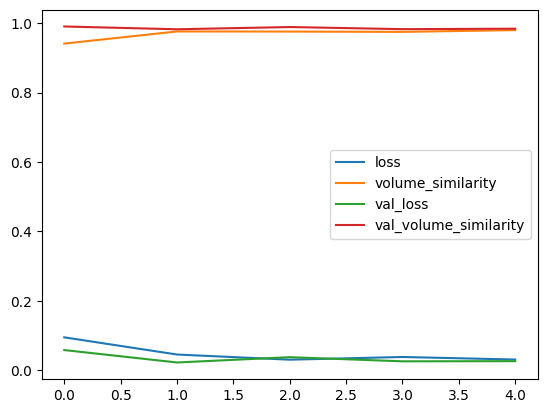

In [29]:
import pandas as pd
pd.DataFrame(history1.history).plot()

# Let's Predict

In [30]:
from skimage.transform import resize

def preprocess_image(image, target_shape):
    image = resize(image, target_shape, anti_aliasing=True)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    # Expand dimensions to match the expected input shape (1, 128, 128, 128)
    image = np.expand_dims(image, axis=0)
    return image

In [31]:
target_shape = (128, 128, 128)
def predict(path):
    image_path = path
    image_nifti = nib.load(image_path)
    image_data = image_nifti.get_fdata()
    # Preprocess the image
    preprocessed_image = preprocess_image(image_data, target_shape)
    predict=model1.predict(preprocessed_image)
    return predict[0, :, :, :,0],preprocessed_image[0, :, :, :]

**Prediction**

In [32]:
predicted_label,preprocessed_image=predict("/kaggle/input/filtaer-data/Final Data/Image/8.nii")
predicted_label.shape,preprocessed_image.shape

1/1 [==============================] - 1s 572ms/step


((128, 128, 128), (128, 128, 128))

# Lets Visualize predocted hypodense region of Brain

In [35]:
def Hypodense_Region(predicted_reasion, image_3D):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Assuming binary_predictions_3d and image_3d are NumPy arrays with shapes (128, 128, 128)
    binary_predictions_3d = predicted_reasion
    image_3d = image_3D
    
    # XY plane
    axes[0, 0].imshow(image_3d.sum(axis=2), cmap='gray')
    axes[0, 0].imshow(binary_predictions_3d.sum(axis=2), cmap='hot', alpha=0.2)
    axes[0, 0].set_title('XY plane (Image and Binary Predictions)')

    # XZ plane
    axes[0, 1].imshow(image_3d.transpose(1, 0, 2).sum(axis=2), cmap='gray', origin='lower')
    axes[0, 1].imshow(binary_predictions_3d.transpose(1, 0, 2).sum(axis=2), cmap='hot', alpha=0.2, origin='lower')
    axes[0, 1].set_title('XZ plane (Image and Binary Predictions)')

    # YZ plane
    axes[0, 2].imshow(image_3d.transpose(2, 0, 1).sum(axis=2), cmap='gray', origin='lower')
    axes[0, 2].imshow(binary_predictions_3d.transpose(2, 0, 1).sum(axis=2), cmap='hot', alpha=0.2, origin='lower')
    axes[0, 2].set_title('YZ plane (Image and Binary Predictions)')

    # XY plane for binary predictions
    axes[1, 0].imshow(binary_predictions_3d.sum(axis=2), cmap='hot')
    axes[1, 0].set_title('XY plane (Binary Predictions)')

    # XZ plane for binary predictions
    axes[1, 1].imshow(binary_predictions_3d.transpose(1, 0, 2).sum(axis=2), cmap='hot', origin='lower')
    axes[1, 1].set_title('XZ plane (Binary Predictions)')

    # YZ plane for binary predictions
    axes[1, 2].imshow(binary_predictions_3d.transpose(2, 0, 1).sum(axis=2), cmap='hot', origin='lower')
    axes[1, 2].set_title('YZ plane (Binary Predictions)')

    plt.show()


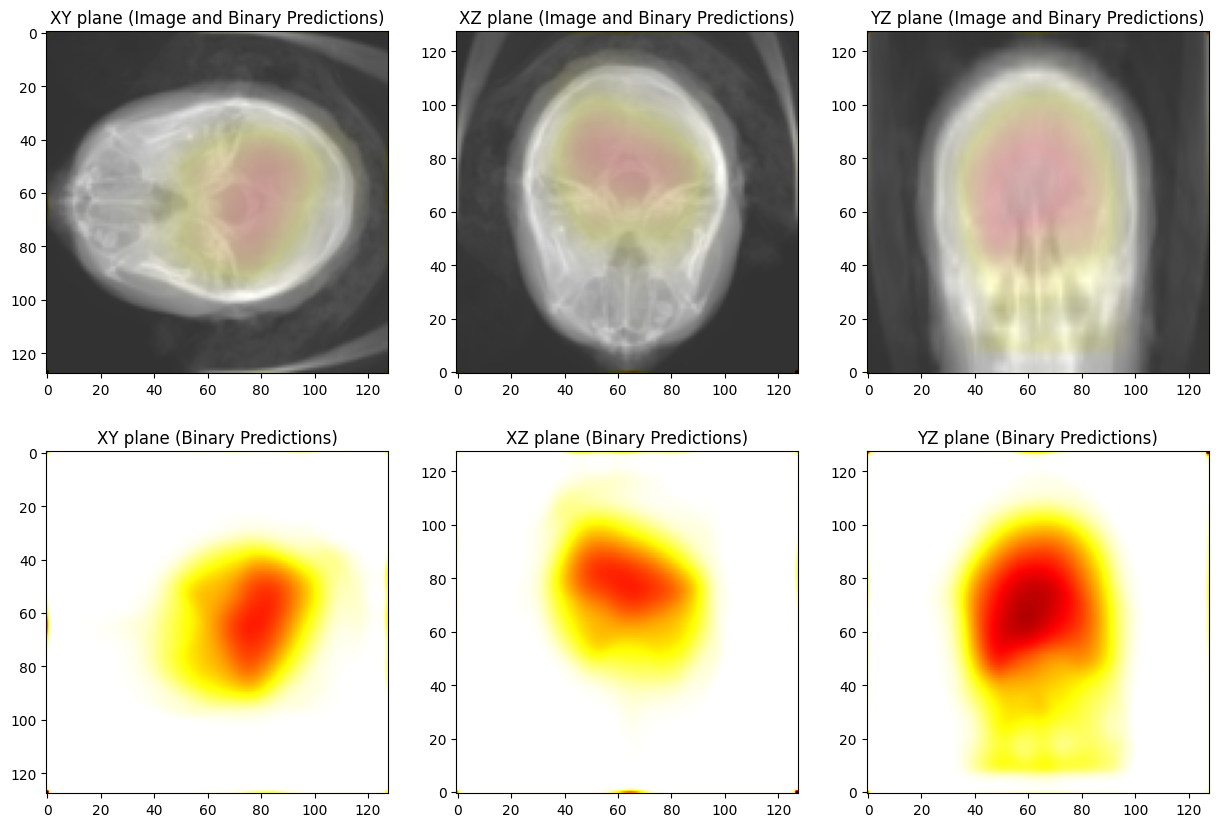

In [36]:
Hypodense_Region(predicted_label,preprocessed_image)

In [38]:
x_test
print(x_test.shape)
y_pred=model1.predict(x_test)
print(y_pred.shape)

(1, 128, 128, 128)
1/1 [==============================] - 0s 34ms/step
(1, 128, 128, 128, 2)


In [39]:
image_3d=x_test[0,:,:,:]
prediction_3d=y_pred[0,:,:,:,0]
image_3d.shape,prediction_3d.shape

((128, 128, 128), (128, 128, 128))

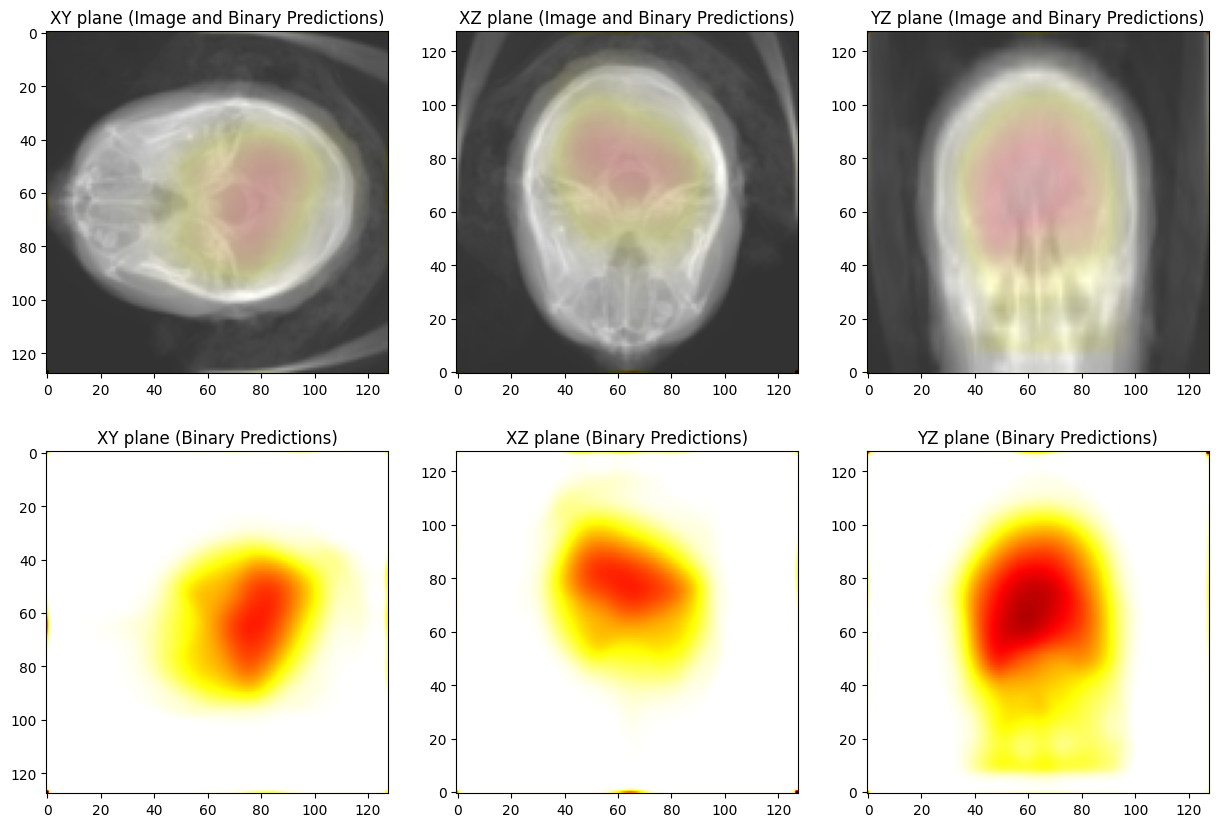

In [40]:
Hypodense_Region(prediction_3d,image_3d)

# # # V-Net: V-Net is another 3D convolutional neural network (CNN) designed for medical image segmentation.

In [42]:
import os
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

def load_and_preprocess_data(data_path, image_folder='Image', label_folder='Lable', target_shape=(128, 128, 128), validation_split=0.125, random_seed=42):
    image_dir = os.path.join(data_path, image_folder)
    label_dir = os.path.join(data_path, label_folder)

    image_files = sorted(os.listdir(image_dir))
    label_files = sorted(os.listdir(label_dir))

    images = []
    labels = []

    for img_file, lbl_file in zip(image_files, label_files):
        img_path = os.path.join(image_dir, img_file)
        lbl_path = os.path.join(label_dir, lbl_file)

        # Load image and label data using NiBabel
        img_data = nib.load(img_path).get_fdata()
        lbl_data = nib.load(lbl_path).get_fdata()

        # Resize volumes to the target shape
        img_data = resize(img_data, target_shape, anti_aliasing=True)
        lbl_data = resize(lbl_data, target_shape, anti_aliasing=False, preserve_range=True)

        # Preprocess data (normalization)
        img_data = (img_data - np.min(img_data)) / (np.max(img_data) - np.min(img_data))
        lbl_data = lbl_data.astype(np.int32)

        images.append(img_data)
        labels.append(lbl_data)

    images = np.array(images)
    labels = np.array(labels)

    # Add channel dimension for compatibility with the V-Net model
    images = np.expand_dims(images, axis=-1)
    labels = to_categorical(labels, num_classes=num_classes)  # Adjust num_classes based on your task

    # Split data into training and validation sets with 7:1 split
    x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=validation_split, random_state=random_seed)

    return x_train, x_val, y_train, y_val


In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, Activation, MaxPooling3D, UpSampling3D, concatenate

def vnet_3d_model(input_shape=(128, 128, 128, 1), num_classes=2):  # Change num_classes to 2
    # Input layer
    inputs = Input(input_shape)

    # Contracting pathway
    conv1 = Conv3D(16, (5, 5, 5), activation=None, padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv3D(16, (5, 5, 5), activation=None, padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = Conv3D(32, (5, 5, 5), activation=None, padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv3D(32, (5, 5, 5), activation=None, padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    # Bottleneck
    conv3 = Conv3D(64, (5, 5, 5), activation=None, padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv3D(64, (5, 5, 5), activation=None, padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    # Expanding pathway
    up4 = concatenate([UpSampling3D(size=(2, 2, 2))(conv3), conv2], axis=-1)
    conv4 = Conv3D(32, (5, 5, 5), activation=None, padding='same')(up4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv3D(32, (5, 5, 5), activation=None, padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)

    up5 = concatenate([UpSampling3D(size=(2, 2, 2))(conv4), conv1], axis=-1)
    conv5 = Conv3D(16, (5, 5, 5), activation=None, padding='same')(up5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv3D(16, (5, 5, 5), activation=None, padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation('relu')(conv5)

    # Output layer
    output = Conv3D(num_classes, (1, 1, 1), activation='sigmoid')(conv5)

    # Model
    Vnet_model = Model(inputs=inputs, outputs=output)
    return Vnet_model

# Create the 3D V-Net model
Vnet_model = vnet_3d_model(input_shape=(128, 128, 128, 1), num_classes=2)
Vnet_model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 128, 1)]   0         []                            
                                                                                                  
 conv3d_41 (Conv3D)          (None, 128, 128, 128, 16)    2016      ['input_4[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 128, 128, 128, 16)    64        ['conv3d_41[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_10 (Activation)  (None, 128, 128, 128, 16)    0         ['batch_normalization_10

In [44]:
data_path = '/kaggle/input/filtaer-data/Final Data'

#binary segmentation task (num_classes = 2)
num_classes = 2

# Load and preprocess data
x_train, x_val, y_train, y_val = load_and_preprocess_data(data_path)

# Print shapes of the data
print("Training Data Shape:", x_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Data Shape:", x_val.shape)
print("Validation Labels Shape:", y_val.shape)


Training Data Shape: (7, 128, 128, 128, 1)
Training Labels Shape: (7, 128, 128, 128, 2)
Validation Data Shape: (1, 128, 128, 128, 1)
Validation Labels Shape: (1, 128, 128, 128, 2)


In [51]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy

tf.random.set_seed(42)
# similarity metric function
def volume_similarity(y_true, y_pred):
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    vs = (intersection + smooth) / (union + smooth)
    return vs

# Compile the model
Vnet_model.compile(optimizer=Adam(lr=0.01), loss=categorical_crossentropy, metrics=[volume_similarity])

# Fit the model
batch_size = 1
epochs = 10

Vnet_history = Vnet_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 21s 2s/step - loss: 0.0409 - volume_similarity: 0.8225 - val_loss: 0.4325 - val_volume_similarity: 0.8727
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 0.0342 - volume_similarity: 0.8134 - val_loss: 1.0610 - val_volume_similarity: 0.9282
Epoch 3/10
7/7 [==============================] - 12s 2s/step - loss: 0.0303 - volume_similarity: 0.8260 - val_loss: 2.0096 - val_volume_similarity: 0.9371
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.0236 - volume_similarity: 0.8321 - val_loss: 0.6945 - val_volume_similarity: 0.8979
Epoch 5/10
7/7 [==============================] - 12s 2s/step - loss: 0.0238 - volume_similarity: 0.8437 - val_loss: 1.8456 - val_volume_similarity: 0.9235
Epoch 6/10
7/7 [==============================] - 12s 2s/step - loss: 0.0217 - volume_similarity: 0.8509 - val_loss: 1.3356 - val_volume_similarity: 0.9128
Epoch 7/10
7/7 [==============================] - 12s 2s/step - 

In [ ]:
Hypodense_Region